<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler,PowerTransformer, StandardScaler, MaxAbsScaler
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from tqdm import tqdm

py.offline.init_notebook_mode(connected=True)

Import Dataset

In [2]:
df = pd.read_csv("../Data/data.csv")
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
submission = pd.read_csv("../Data/sample_submission.csv")
submission.head()

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


Data Preprocessing

In [4]:
df.shape

(98000, 30)

In [5]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [7]:
df.isnull().sum()

id      0
f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

Great! we don't have any null value

EDA and Visualization

In [8]:
# sns.pairplot(df)
# plt.show()

Apply corelation technique

In [9]:
df.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


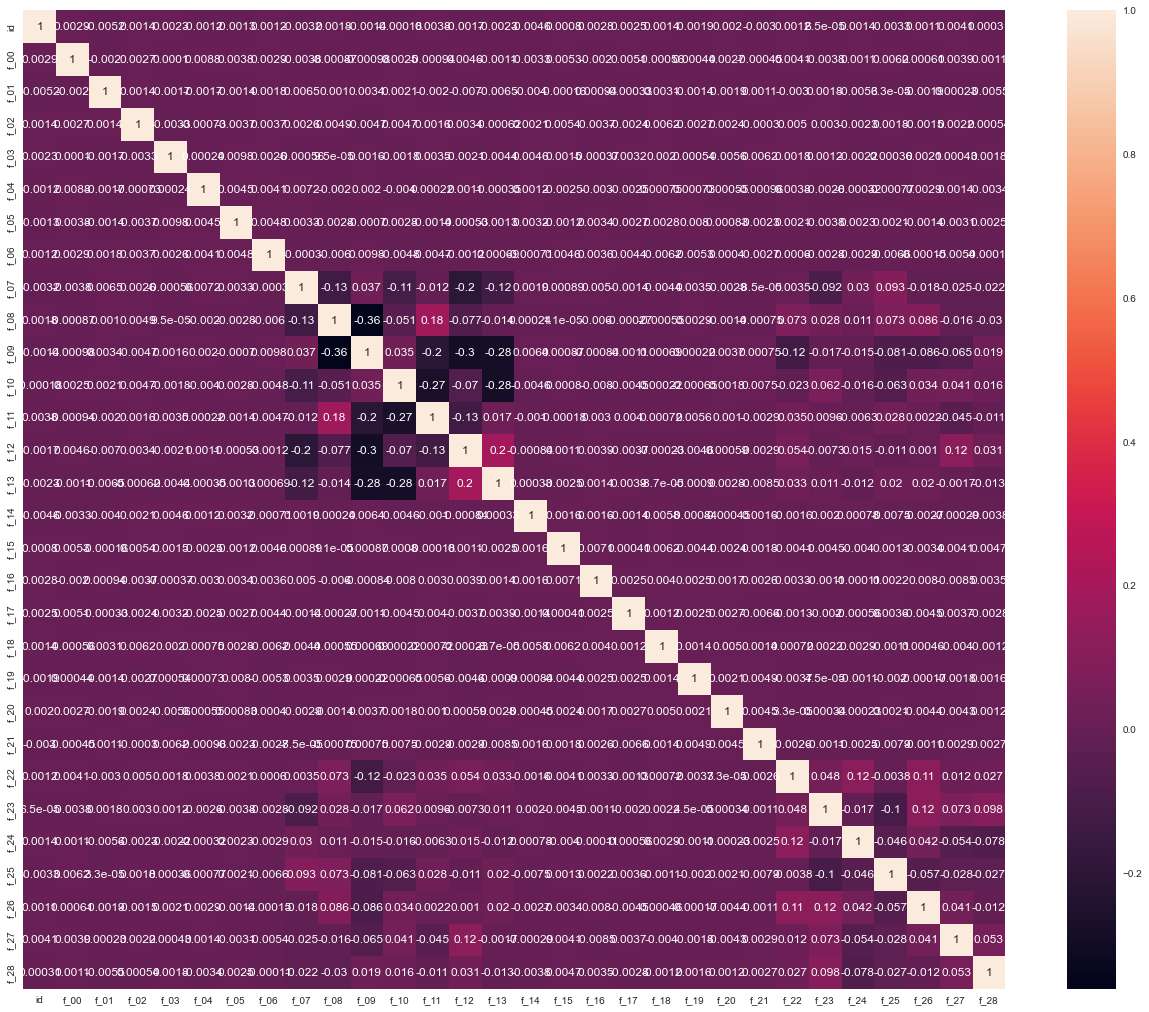

In [10]:
# now, plot the data

plt.figure(figsize=(22,18))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(df, 0.1)
len(set(corr_features))

11

In [13]:
corr_features


{'f_08',
 'f_09',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_22',
 'f_24',
 'f_25',
 'f_26',
 'f_27'}

In [14]:
X_corr = df.drop(corr_features,axis=1)
X_corr

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_23,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,1.142641,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,0.459685,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,-0.088322,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,-2.041828,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,-2.438365,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,0.362517,1.010965,-1.001519,0.409882,-0.504114,-0.290116,-0.258141,-0.973640,0.391055,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,0.683558,-1.238120,0.863433,1.318554,-1.125758,0.117687,1.388242,0.342400,-0.860409,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,-1.337303,0.064310,0.612507,0.398968,-0.409608,-0.850223,-1.787648,-1.268115,1.945622,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,-0.612314,-0.416691,-0.750458,0.165038,0.333685,-0.010839,1.118906,1.565765,0.547615,-0.066211


Standardization

In [15]:
cols = df.drop(columns=['id']).columns
cols

Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_27', 'f_28'],
      dtype='object')

In [16]:
data = df[cols]
data

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,11,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [17]:
# Select scaler and transformer

#scaler = StandardScaler()
#df = scaler.fit_transform(df)

Abs_scaler = MaxAbsScaler().fit(data)
data = Abs_scaler.fit_transform(data)

#rob_scaler = RobustScaler().fit(data)
#data = rob_scaler.fit_transform(data)

power_transformer = PowerTransformer().fit(data)
data = power_transformer.transform(data)

#quantile_transformer = QuantileTransformer(output_distribution='normal').fit(data)
#data = quantile_transformer.transform(data)

X_scaled = pd.DataFrame(data, columns=cols)
X_scaled

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389214,-0.917595,0.648026,0.590794,-0.824839,0.734726,2.258634,-1.025849,1.416210,1.104639,...,-0.472796,-0.753837,-0.763138,-0.707687,0.911286,-0.678769,0.768872,0.960589,1.044229,0.693363
1,-0.688343,-0.458551,0.653256,0.995491,-1.644095,0.864904,-0.085610,-1.025849,-0.917129,-0.219888,...,-0.423449,-0.088090,-1.778004,-0.535924,0.453141,1.031995,-0.120019,-0.551558,0.367193,-1.632988
2,0.805736,0.319496,-1.167199,-0.622338,0.108418,0.785046,1.990036,0.000862,1.044870,-0.453010,...,-0.408275,-1.598766,1.194129,2.204238,0.086137,-1.518918,-0.568980,0.979203,-0.925330,-2.295500
3,-0.500449,0.224093,0.262979,0.234051,0.417077,-1.218870,0.144455,0.285546,-1.235141,0.979536,...,0.620343,1.283814,0.533013,0.731742,-1.217743,0.826924,-1.171309,-0.396198,-0.101020,0.323597
4,-0.670402,-1.044451,-0.270555,-1.833519,-0.285916,-1.849552,0.787766,0.786547,0.175188,-0.453010,...,-1.615251,-0.432316,0.322156,0.227003,-1.481657,0.848441,-0.614021,1.165287,-0.374743,-1.156993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.236090,1.648820,-0.688289,0.316108,-0.294819,0.330327,1.611017,0.000862,0.175188,0.192392,...,-0.285507,-0.255894,-0.972327,0.953666,0.407148,1.284268,-0.077663,-0.989422,0.166338,0.457077
97996,0.320937,0.704710,0.561603,-1.322057,-0.353300,0.183266,0.184235,-0.651268,0.633441,-1.285728,...,0.120435,1.383688,0.342091,1.160290,-0.429981,0.271377,0.784262,0.140360,0.693639,0.638477
97997,-0.249510,-0.464142,1.889491,-1.340744,0.197732,-0.557804,-0.375800,0.786547,0.633441,0.543752,...,-0.842363,-1.784109,-1.265335,-0.994906,1.450956,0.867559,0.178499,1.541355,1.180404,0.583292
97998,0.309684,2.175086,0.760609,0.438870,0.466890,0.063617,-0.329863,-1.438508,0.410645,0.700049,...,-0.007552,1.115833,1.571433,0.276960,0.512080,0.687810,-0.287849,-1.084754,-0.538573,0.125657


In [18]:
rb_scaler=RobustScaler()
X=rb_scaler.fit_transform(X_scaled)
X

array([[-0.28947047, -0.68224972,  0.4816357 , ...,  0.75709012,
         0.81405584,  0.52675794],
       [-0.5112566 , -0.3416481 ,  0.48551545, ..., -0.43008149,
         0.28575536, -1.21911739],
       [ 0.59651337,  0.23564652, -0.86491764, ...,  0.77170382,
        -0.7228175 , -1.71631811],
       ...,
       [-0.18588841, -0.34579697,  1.40256818, ...,  1.2130437 ,
         0.92031498,  0.44415197],
       [ 0.22872047,  1.61245736,  0.56515141, ..., -0.84868817,
        -0.42102589,  0.10070676],
       [ 0.55667985,  0.41561239,  1.08252746, ..., -0.49552398,
         0.78030138, -0.21767153]])

In [19]:
pca = PCA(n_components=3,random_state=1)
pca.fit(X_scaled)
PCA_ds = pd.DataFrame(pca.transform(X_scaled), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,98000.0,1.977556e-17,1.342689,-4.497655,-0.950364,-0.135277,0.880443,4.883534
col2,98000.0,1.084960e-17,1.194287,-4.631732,-0.835397,-0.021040,0.816269,5.280668
col3,98000.0,-4.346410e-17,1.145429,-4.573386,-0.793429,-0.014646,0.782025,4.872426


In [20]:
PCA_ds

,col1,col2,col3
0,-0.722519,-0.001755,-0.342033
1,-1.038104,0.638854,1.751857
2,-1.136916,-0.750259,-1.751997
3,1.318203,-0.240165,0.237128
4,-1.030974,-0.027852,0.754141
...,...,...,...
97995,-0.137288,-0.334981,0.057301
97996,-2.194609,0.682794,0.871442
97997,0.625009,0.764844,-1.547139
97998,0.458691,1.283743,0.125002


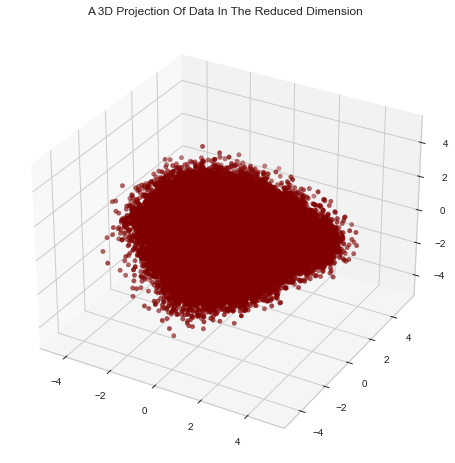

In [21]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [22]:
X

array([[-0.28947047, -0.68224972,  0.4816357 , ...,  0.75709012,
         0.81405584,  0.52675794],
       [-0.5112566 , -0.3416481 ,  0.48551545, ..., -0.43008149,
         0.28575536, -1.21911739],
       [ 0.59651337,  0.23564652, -0.86491764, ...,  0.77170382,
        -0.7228175 , -1.71631811],
       ...,
       [-0.18588841, -0.34579697,  1.40256818, ...,  1.2130437 ,
         0.92031498,  0.44415197],
       [ 0.22872047,  1.61245736,  0.56515141, ..., -0.84868817,
        -0.42102589,  0.10070676],
       [ 0.55667985,  0.41561239,  1.08252746, ..., -0.49552398,
         0.78030138, -0.21767153]])

Elbow Method to determine the number of clusters to be formed:


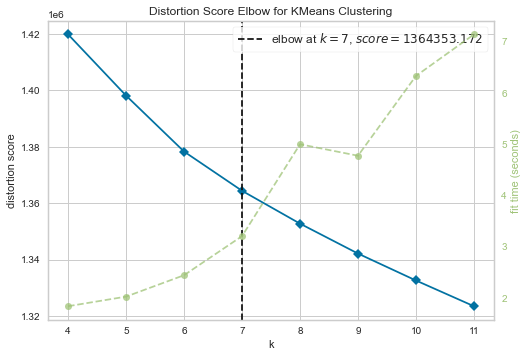

CPU times: total: 4min 7s
Wall time: 33.5 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
%%time 

from sklearn.cluster import KMeans

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(4,12))
Elbow_M.fit(X)
Elbow_M.show()
# 1.364.353.172

In [ ]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=10)
# fit model and predict clusters
preds = BGM.fit_predict(X)
PCA_ds["Clusters"] = preds
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
submission.Predicted=pd.DataFrame(preds)

In [ ]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

**Submission File**

In [ ]:
submission.to_csv("submission.csv",index=False)